In [1]:
import pyspark as ps
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.streaming import StreamingContext

from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd

In [2]:
conf = SparkConf().setMaster("local[2]").setAppName("spark_streaming_funtime")

In [3]:
sc = SparkContext(conf=conf)

In [4]:
sc

<SparkContext master=local[2] appName=spark_streaming_funtime>

In [5]:
sqlContext = SQLContext(sc)

In [6]:
ssc = StreamingContext(sc, 5) 

In [7]:
ssc

In [8]:
#see bin/TweetRead.py
ip = "192.168.43.40"
port = 5555
stream = ssc.socketTextStream(ip, port)

In [9]:
lines = stream.window( 20 )

In [10]:
from collections import namedtuple
fields = ("tag", "count" )
Tweet = namedtuple( 'Tweet', fields )

In [11]:
( lines.flatMap( lambda text: text.split( " " ) )
  .filter( lambda word: word.lower().startswith("#") )
  .map( lambda word: ( word.lower(), 1 ) )
  .reduceByKey( lambda a, b: a + b )
  .map( lambda rec: Tweet( rec[0], rec[1] ) )
  .foreachRDD( lambda rdd: rdd.toDF().sort("count", ascending=False )
              .limit(10).registerTempTable("tweets") ) )

In [12]:
sqlContext

In [13]:
ssc.start()

In [14]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

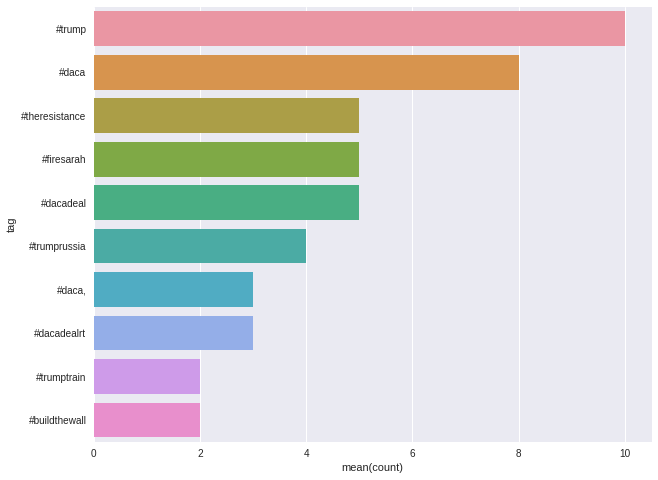

In [ ]:
import time
from IPython import display


count = 0
while count < 10:
  time.sleep( 20 )
  top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )
  top_10_df = top_10_tweets.toPandas()
  display.clear_output(wait=True)
  sn.plt.figure( figsize = ( 10, 8 ) )
  sn.barplot( x="count", y="tag", data=top_10_df)
  sn.plt.show()
  count = count + 1

In [ ]:
ssc.stop()